In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
%cd /content/gdrive/MyDrive/image captioning

/content/gdrive/.shortcut-targets-by-id/1w3IH2Ta6QYGFYwRHAkWw8AEYanGiLtrL/image captioning


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/image captioning research work/image captioning')

In [3]:
!pip install transformers

     |████████████████████████████████| 2.8 MB 5.3 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 636 kB 50.2 MB/s 
     |████████████████████████████████| 895 kB 46.6 MB/s 
     |████████████████████████████████| 3.3 MB 46.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
import torch
from torch.utils.data import DataLoader

import numpy as np
import time

import os

from models import utils, caption
from datasets import coco
from configuration import Config
from engine import train_one_epoch , evaluate
config = Config()

In [ ]:
%cd gdrive/MyDrive/image captioning research work/image captioning


/content/gdrive/MyDrive/image captioning research work/image captioning


In [8]:
ls

 configuration.py   finetune.py       main.ipynb   predict.py
 datasets/         'image&caption'/   main.py      __pycache__/
 engine.py          losses/           models/


In [ ]:
!CUDA_LAUNCH_BLOCKING=1 python main.py
#!python main.py

Initializing Device: cuda
Number of params: 145091248
Train: 18308
Valid: 1830
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Start Training..
Epoch: 0
  0% 0/1144 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=4

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# positional embedding: sine, learned (letter_wise)
# Bangla Bert > sine and learned. 


In [ ]:
#!CUDA_LAUNCH_BLOCKING=1 python finetune.py

In [ ]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

f = open('/content/gdrive/MyDrive/image captioning research work/image captioning/image&caption/annotations/captions.json','r')
db = json.load(f)
def caption(image):
  for i in range(len(db)):
    if db[i]['filename'] == image:
      caps = db[i]['caption']
      pass
  return caps

caption0:দুইজন পুরুষ বসে আছে।
caption1:গাছের নিচে মাটির কাজ করা ২ জন পুরুষ মানুষ বসে আছেন। 


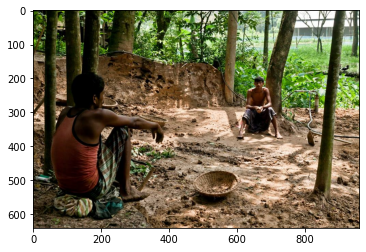

In [ ]:
image = "7330.png" 
caps = caption(image)
image_path = '/content/gdrive/MyDrive/image captioning research work/image captioning/image&caption/validation/' + image
im =  Image.open(image_path)
plt.imshow(np.asarray(im))
for i, cap in enumerate(caps):
  print('caption{}:{}'.format(i,cap))
#!python predict.py --path image_path --checkpoint '/content/gdrive/MyDrive/image captioning research work/image captioning/checkpoint.pth'


In [ ]:
!python predict.py --path '/content/gdrive/MyDrive/image captioning research work/image captioning/image&caption/validation/7330.png' --checkpoint '/content/gdrive/MyDrive/image captioning research work/image captioning/checkpoint.pth'

Checking for checkpoint.
Traceback (most recent call last):
  File "predict.py", line 36, in <module>
    raise NotImplementedError('Give valid checkpoint path')
NotImplementedError: Give valid checkpoint path


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Number of params: 83959866

In [ ]:
import pandas as pd


In [ ]:
colnames = ["epoch","training loss","validation loss"]
loss = pd.read_csv("/content/gdrive/MyDrive/image captioning research work/image captioning/losses/loss.csv",names =colnames )

In [ ]:
loss.dropna(inplace=True)
loss

,epoch,training loss,validation loss
0,0,0.8900,0.5100
1,1,0.4200,0.4100
2,2,0.3650,0.3620
3,3,0.3340,0.3330
4,4,0.3119,0.3117
5,5,0.2936,0.2953
6,6,0.2780,0.2810
7,7,0.2660,0.2690
8,8,0.2540,0.2570
9,9,0.2430,0.2460


In [ ]:
import matplotlib.pyplot as plt


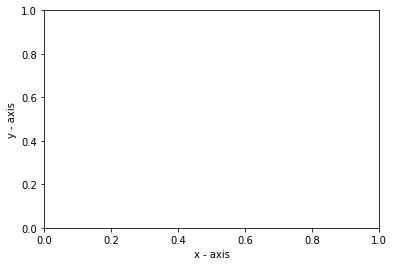

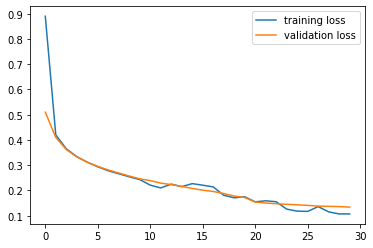

In [ ]:
nloss=loss.drop(['epoch'],axis=1)
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
nloss.plot()

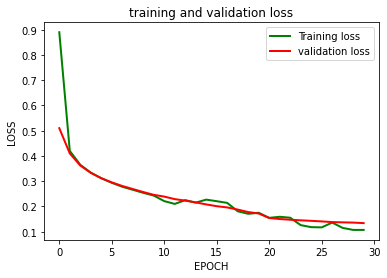

In [ ]:
plt.plot(loss['epoch'], loss['training loss'], color='green', linewidth = 2,)
plt.plot(loss['epoch'], loss['validation loss'], color='red', linewidth = 2,)

# naming the x axis
plt.xlabel('EPOCH')
# naming the y axis
plt.ylabel('LOSS')
 
# giving a title to my graph
plt.title('training and validation loss')
plt.legend(['Training loss', 'validation loss'])
# function to show the plot
plt.show()